<a href="https://colab.research.google.com/github/melekbairamova20/melekbairamova20/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)" , "petal width (cm)"]].values
y = (iris.target == 2) #Iris Virginica

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C = 1, random_state = 42, dual = 'auto'))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual='auto', random_state=42))])

In [ ]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.target == 2

,target
0,False
1,False
2,False
3,False
4,False
...,...
145,True
146,True
147,True
148,True


In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linear_svc = LinearSVC(random_state = 42, dual = 'auto')
linear_svc.fit(X_train, y_train)
linear_svc.score(X_train, y_train)

0.8

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                         LinearSVC(dual = "auto"))

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

1.0

In [ ]:
linear_svc.score(X_test, y_test)

1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
clf.score(X_train, y_train)


0.825

In [ ]:
clf.score(X_test, y_test)

1.0

In [ ]:
X_poly = PolynomialFeatures(degree = 3).fit_transform(X)
X_poly.shape

(100, 10)

In [ ]:
X.shape

(100, 2)

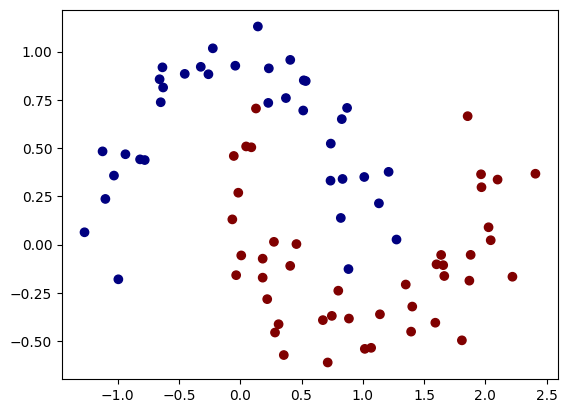

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = "jet")

In [ ]:
# plt.scatter(X_poly[:,8], X_poly[:,9], c = y_train, cmap = "jet")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf = Pipeline([('standard_scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree = 3)),
                    ('log_reg', LogisticRegression())])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [ ]:
X_train.shape

(80, 2)

In [ ]:
X_poly.shape

(100, 10)

#Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel= "poly",  degree = 3, coef0=1, C = 5))
poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_clf.score(X_test, y_test)

0.9

In [ ]:
poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
)

In [ ]:
from sklearn.svm import LinearSVR
np.random.seed(42)
X = 2 * np.random.rand(1000,1)
y = 4 + 3 * X[:,0] + np.random.randn(1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon = 0.5, random_state = 42))
svm_reg.fit(X_train, y_train)
svm_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.772947541616774

In [ ]:
from sklearn.svm import SVR
np.random.seed(42)
X = 2 * np.random.rand(50,1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X [:,0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel = "poly", degree = 2, C = 0.01, epsilon = 0.1))
svm_poly_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])